In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# set the CARMA model parameters
sigmay = 2.3  # dispersion in the time series
p = 5  # order of the AR polynomial
mu = 17.0  # mean of the time series
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # widths of of Lorentzian components
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # centroids of Lorentzian components
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # compute the roots r_k from the Lorentzian function parameters
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # carma_varian

Text(0,0.5,'magnitud')

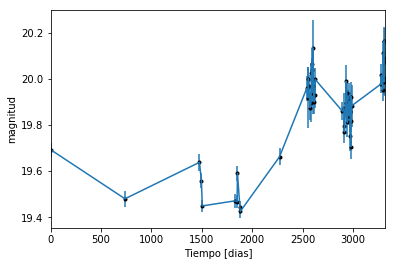

In [2]:
data = np.genfromtxt('LC_U_141827.dat')
juldate = data[:,0]  # time is given by the julian date
t = juldate - juldate.min()  # set first time value to zero for convenience. units of t are days.
y = data[:,1]  # i-band magnitudes
yerr = data[:,2]  # standard deviation in the measurement noise

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=5, q=4)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

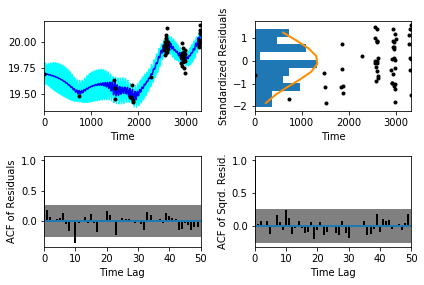

In [5]:
sample.assess_fit()

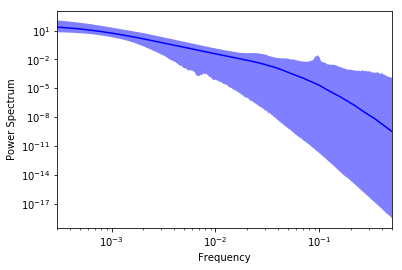

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.302231,'Nivel de ruido')

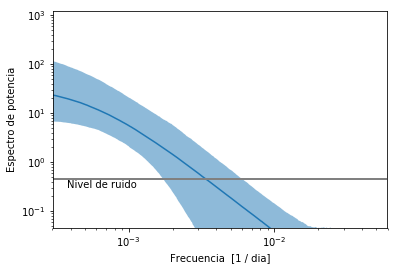

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

In [10]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [11]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 5)

In [12]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 261.980203733
Median: 0.113744492698
Standard deviation: 0.277795179434
68% credibility interval: [ 0.        0.578893]
95% credibility interval: [ 0.          0.92019046]
99% credibility interval: [ 0.          0.98552548]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 261.980203733
Median: 0.113744492698
Standard deviation: 0.277795179434
68% credibility interval: [ 0.        0.578893]
95% credibility interval: [ 0.          0.92019046]
99% credibility interval: [ 0.          0.98552548]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 742.713121447
Median: 0.0
Standard deviation: 0.0572654125123
68% credibility in

Plotting parameter summary


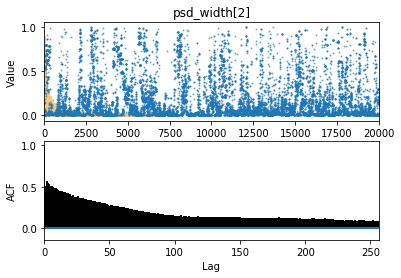

In [13]:
sample.plot_parameter('psd_width', 2, doShow=True)

In [14]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 396.631668576
Median: 78.9935655267
Standard deviation: 2.26872923566
68% credibility interval: [ 76.59876676  81.06674705]
95% credibility interval: [ 73.98233419  82.59969016]
99% credibility interval: [ 71.9566029   84.69275218]


In [16]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 6)

In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 145.634264829
Median: 1.57712637118
Standard deviation: 2.45586040273
68% credibility interval: [ 0.28026235  5.11212626]
95% credibility interval: [ 0.06461312  8.58316257]
99% credibility interval: [  0.02490071  11.10922669]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 365.573426038
Median: 3.13217559223
Standard deviation: 11.3111062234
68% credibility interval: [  0.22253614  18.41046615]
95% credibility interval: [  1.71414951e

In [18]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 5)

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1904.13955783
Median: 3.84268325308e-25
Standard deviation: 169255.926591
68% credibility interval: [  5.70074492e-58   5.88503642e-08]
95% credibility interval: [  2.97508632e-83   1.60000000e+01]
99% credibility interval: [  2.69866978e-92   1.70852930e+02]
Posterior summary for parameter ma_coefs  element 2
----------------------------------------------
Effective number of independent samples: 20020.0310459
Median: 1.93239570957e-13
Standard deviation: 4.0786061797e+23
68% credibility interval: [  6.16607193e-26   2.2349094

In [20]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1856.26049459
Median: 19.7132244754
Standard deviation: 0.117058473252
68% credibility interval: [ 19.61096559  19.81529545]
95% credibility interval: [ 19.48116968  19.95669401]
99% credibility interval: [ 19.37555537  20.06858426]


In [22]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 5)

In [23]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 261.980203733
Median: 0.113744492698
Standard deviation: 0.277795179434
68% credibility interval: [ 0.        0.578893]
95% credibility interval: [ 0.          0.92019046]
99% credibility interval: [ 0.          0.98552548]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 261.980203733
Median: 0.113744492698
Standard deviation: 0.277795179434
68% credibility interval: [ 0.        0.578893]
95% credibility interval: [ 0.          0.92019046]
99% credibility interval: [ 0.          0.98552548]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 742.713121447
Median: 0.0
Standard deviation: 0.0572654125123
68% credibility in

In [24]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [25]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 396.631668576
Median: 78.9935655267
Standard deviation: 2.26872923566
68% credibility interval: [ 76.59876676  81.06674705]
95% credibility interval: [ 73.98233419  82.59969016]
99% credibility interval: [ 71.9566029   84.69275218]


In [26]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 5)

In [27]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 410.425986931
Median: 0.0117803806996
Standard deviation: 0.145729281961
68% credibility interval: [ 0.00109168  0.12228434]
95% credibility interval: [  3.70269518e-04   5.53472806e-01]
99% credibility interval: [  3.10711813e-04   8.37925581e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 533.22293866
Median: 0.00536660419448
Standard deviation: 0.0895676925623
68% credibility interval: [ 0.00069682  0.05223312]
95% credibility interval: [ 0.0003362   0.32441431]
99% credibility interval: [  3.07307303e-04   5.66583675e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 389.960765714
Median: 0.0505843917926
Standard d

In [28]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [29]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 938.418891511
Median: 0.0478204218929
Standard deviation: 0.0575471169007
68% credibility interval: [ 0.02973679  0.08745753]
95% credibility interval: [ 0.01945325  0.19692763]
99% credibility interval: [ 0.01543176  0.36318557]


In [30]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [31]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 522.072464106
Median: 1.13009519624
Standard deviation: 0.218109930742
68% credibility interval: [ 0.93527427  1.37243989]
95% credibility interval: [ 0.79480563  1.63492445]
99% credibility interval: [ 0.72119912  1.80321237]


In [32]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [33]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 4521.92542486
Median: 0.000947678592846
Standard deviation: 0.671067325555
68% credibility interval: [  9.14096156e-06   7.64502251e-02]
95% credibility interval: [  1.06851895e-07   1.04884984e+00]
99% credibility interval: [  1.92376138e-09   4.27449810e+00]


In [34]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 5)

In [35]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 410.425986931
Median: (-0.074018314925-1.23935185598j)
Standard deviation: 1.97103017685
68% credibility interval: [-0.76833517-3.22611441j -0.00685920-2.97815796j]
95% credibility interval: [ -3.47757220e+00-4.97660921j  -2.32647200e-03-0.14838295j]
99% credibility interval: [ -5.26484170e+00-5.81369369j  -1.95225990e-03-0.17049213j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 533.22293866
Median: (-0.0337193686242+1.71716608607j)
Standard deviation: 1.83392104659
68% credibility interval: [-0.32819040+1.66207273j -0.00437826+1.11092877j]
95% credibility interval: [-2.03835525+5.13637513j -0.00211243+2.65913481j]
99% credibility interval: [ -3.55995023e+00+5.37339108j  -1.93086873e-03+0.88674135j]
Posterior summar

Plotting 2d PDF w KDE


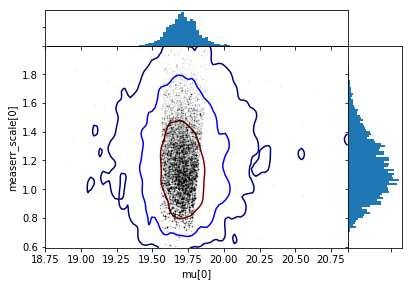

In [36]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


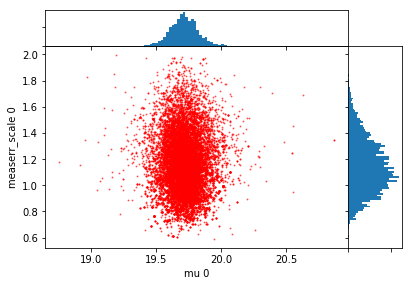

In [37]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


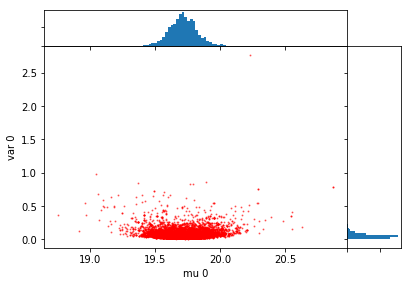

In [38]:
sample.plot_2dpdf('mu', 'var', doShow=True)

Plotting 2d PDF w KDE


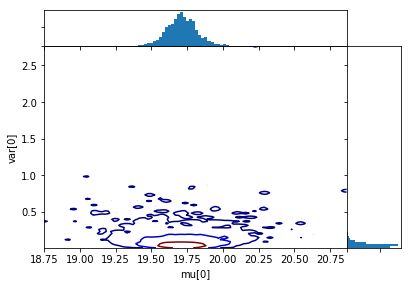

In [39]:
sample.plot_2dkde('mu', 'var', doShow=True)

Text(0.5,1,'Interpolacion, camino simulado')

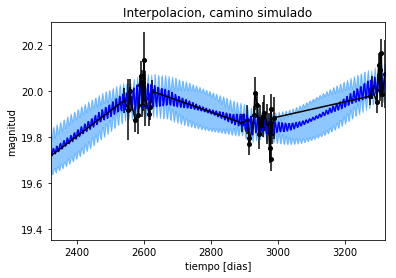

In [40]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

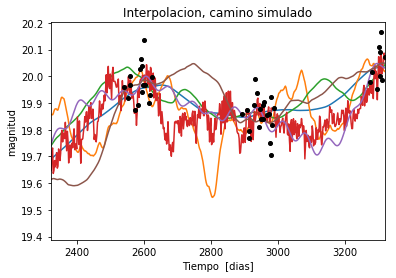

In [41]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 6
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')